In [1]:
# Necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from statsmodels.graphics.mosaicplot import mosaic
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the dataset from the csv file

df = pd.read_csv('/content/drive/MyDrive/data science/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Checking the variable types

df.dtypes


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [43]:
df[df['sex'] == 0]["DEATH_EVENT"].value_counts()

0    71
1    34
Name: DEATH_EVENT, dtype: int64

In [4]:
# Even though it seems that all of the variables are numerical, some of them are actually categorical.
# It is always important to consider the characteristics of our variable instead of just asuming it is numerical when represented numerically.
# Variables like "anaemia," "diabetes," "sex", "high_blood_pressure" and "smoking" despite being encoded with 0 and 1 values, are considered categorical
# because they represent distinct groups

categorical_variables = [name for name in df.columns if df[name].isin([0, 1]).all()]
categorical_variables

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [5]:
numerical_variables = list(set(df.columns) - set(categorical_variables))
numerical_variables

['age',
 'creatinine_phosphokinase',
 'serum_sodium',
 'platelets',
 'serum_creatinine',
 'ejection_fraction',
 'time']

In [6]:
# Computing basic statistics for numerical variables

df[numerical_variables].describe()

,age,creatinine_phosphokinase,serum_sodium,platelets,serum_creatinine,ejection_fraction,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,136.625418,263358.029264,1.39388,38.083612,130.260870
std,11.894809,970.287881,4.412477,97804.236869,1.03451,11.834841,77.614208
min,40.000000,23.000000,113.000000,25100.000000,0.50000,14.000000,4.000000
25%,51.000000,116.500000,134.000000,212500.000000,0.90000,30.000000,73.000000
50%,60.000000,250.000000,137.000000,262000.000000,1.10000,38.000000,115.000000
75%,70.000000,582.000000,140.000000,303500.000000,1.40000,45.000000,203.000000
max,95.000000,7861.000000,148.000000,850000.000000,9.40000,80.000000,285.000000


<Axes: >

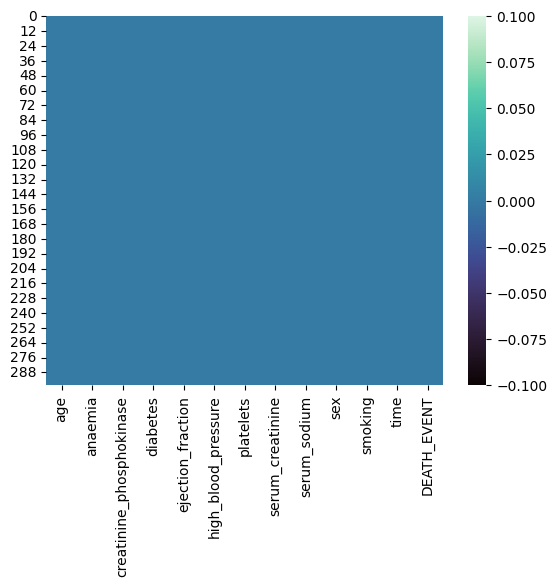

In [7]:
# Checking and visualizing missing values

sns.heatmap(df.isna(), cmap='mako') # There are no missing values

In [8]:
# Checking the distribution of values in the target column

df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

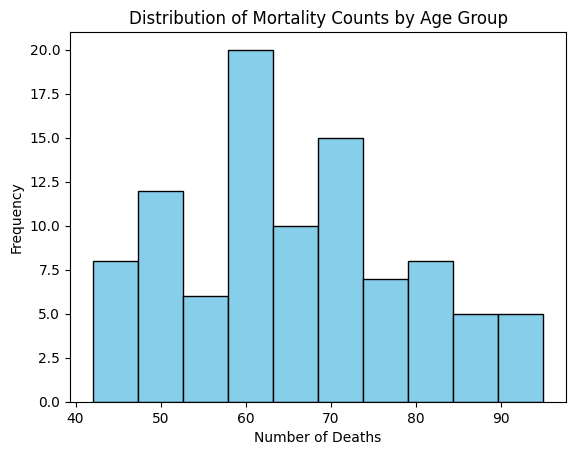

In [9]:
# Identifying which age group had the highest number of deaths

death_counts_by_age = df[df['DEATH_EVENT'] == 1].groupby('age')['DEATH_EVENT'].count().sort_values(ascending=False)
# The outcome is as expected, because looking at the basic statistics done before, the mean age value is around 60 years old
plt.hist(death_counts_by_age.index, weights = death_counts_by_age.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Mortality Counts by Age Group')
plt.show()

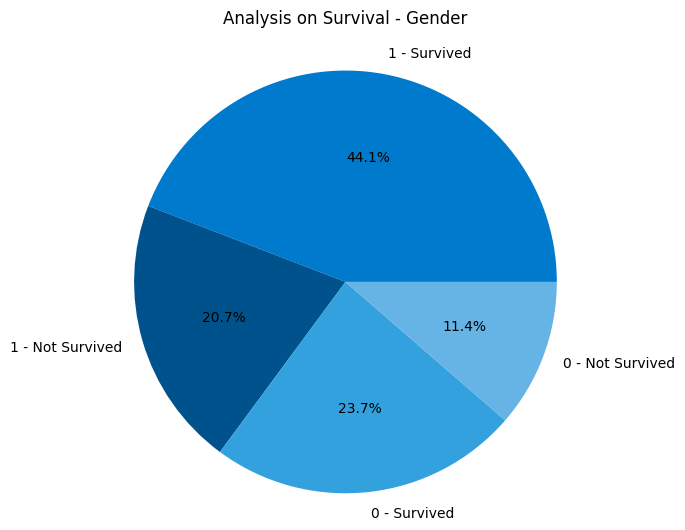

1    194
0    105
Name: sex, dtype: int64

In [47]:
# How does gender influence the mortality, in our case the genders are coded as 1 and 0 (there is no explanation which one is which)

labels = ['1 - Survived', '1 - Not Survived', '0 - Survived', '0 - Not Survived']
values = [len(df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 0)]), len(df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 1)]),
          len(df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 0)]), len(df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 1)])]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors = ['#007acc', '#00528c', '#33a1de', '#66b3e6'])
plt.title("Analysis on Survival - Gender", pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# We can see that the gender coded as 1 has a higher chance of survival, based just on the pie chart

# Let's see the distribution of the df['sex'] values.
df['sex'].value_counts()

In [52]:
print("Gender coded as 0: ")
df[df['sex'] == 0]["DEATH_EVENT"].value_counts()

Gender coded as 0: 


0    71
1    34
Name: DEATH_EVENT, dtype: int64

In [53]:
print("Gender coded as 1: ")
df[df['sex'] == 1]["DEATH_EVENT"].value_counts()

Gender coded as 1: 


0    132
1     62
Name: DEATH_EVENT, dtype: int64

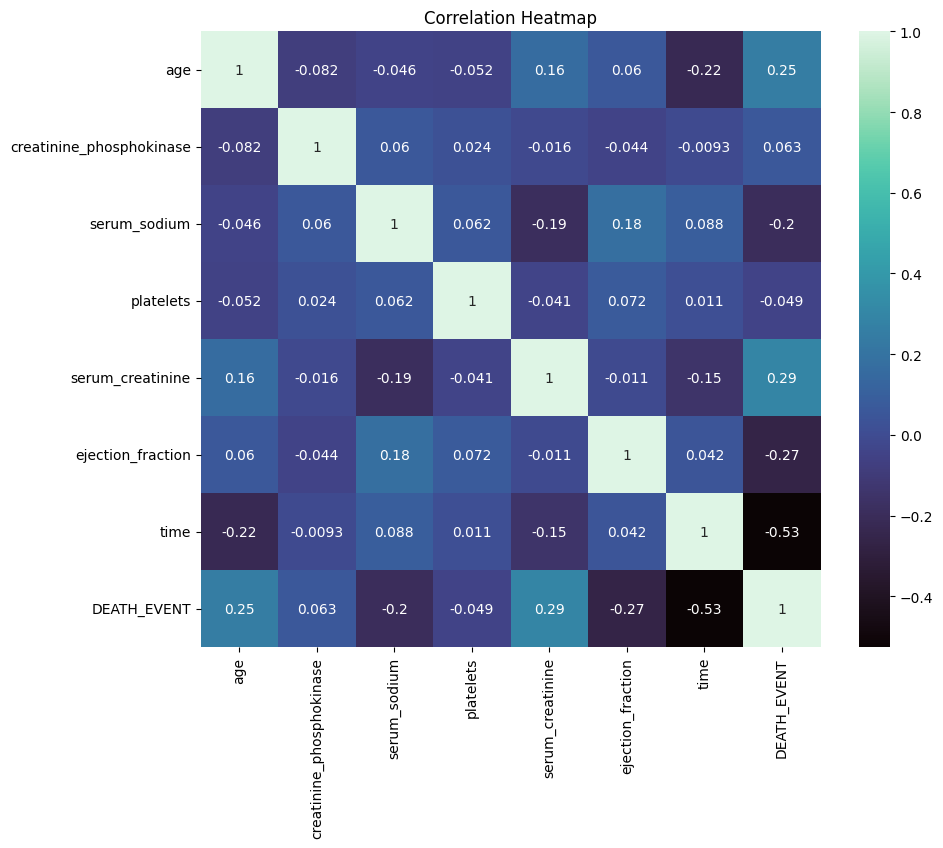

In [15]:
plt.figure(figsize=(10, 8))

columns_of_interest = numerical_variables + ["DEATH_EVENT"]
sns.heatmap(df[columns_of_interest].corr(), annot=True, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

# Looking at the correlations, it can be seen that the most correlated values are 'time' and 'DEATH_EVENT'.
# Their correlaction is negative which means that longer follow-up periods may be associated with a lower risk of death, what can also be seen on the boxplot above

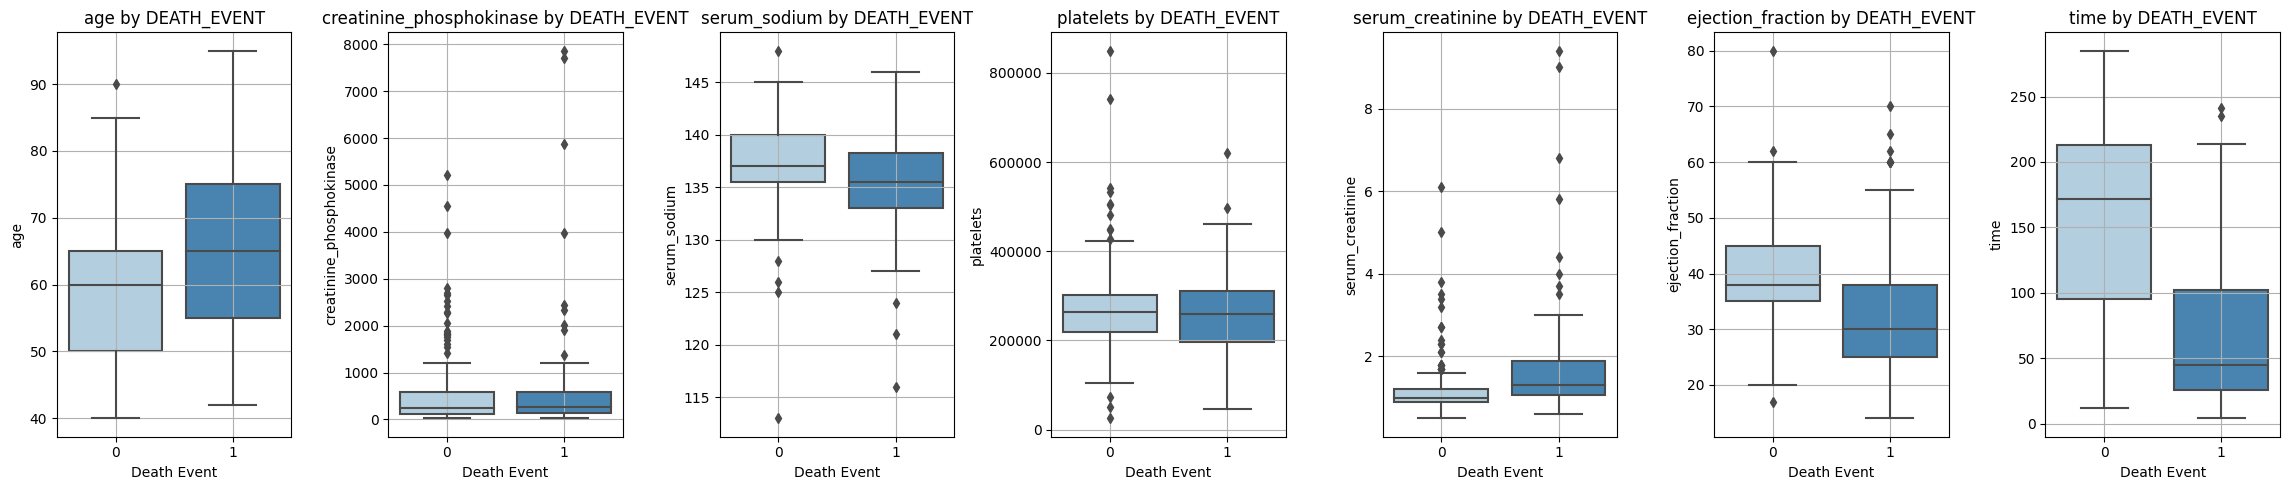

In [21]:
# Creating a set of boxplots to visualize the distribution of numerical variables in a dataset based on the values of the target column

# Creating subplots in a single row
fig, axes = plt.subplots(1, len(numerical_variables), figsize=(23, 5))

# Iterating through numerical columns
for i, column in enumerate(numerical_variables):
    ax = axes[i]

    sns.boxplot(x='DEATH_EVENT', y=column, data=df, ax=ax, palette='Blues')
    ax.set_xlabel('Death Event')
    ax.set_ylabel(column)
    ax.set_title(f'{column} by DEATH_EVENT')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Looking at the boxplot of creatinine_phosphokinase and the target column, we can see that those plots are very similar for both 0 and 1 values, except for the outliers.
# This high similarity may suggest that creatinine phosphokinase, by itself, may not be a highly distinguishing factor between patients who died and those who didn't.
# Also we can see that the patients who did not experience a death event generally fall into a younger age range compared to those who did, which is quite predictable,
# because older individuals are at a higher risk of mortality.
# On the last plot, we can notice, that the boxplots vary the most. Analyzing them, we can conclude, that longer follow-up period increases the chance of surival,
# because the medical staff monitors the patients' condition



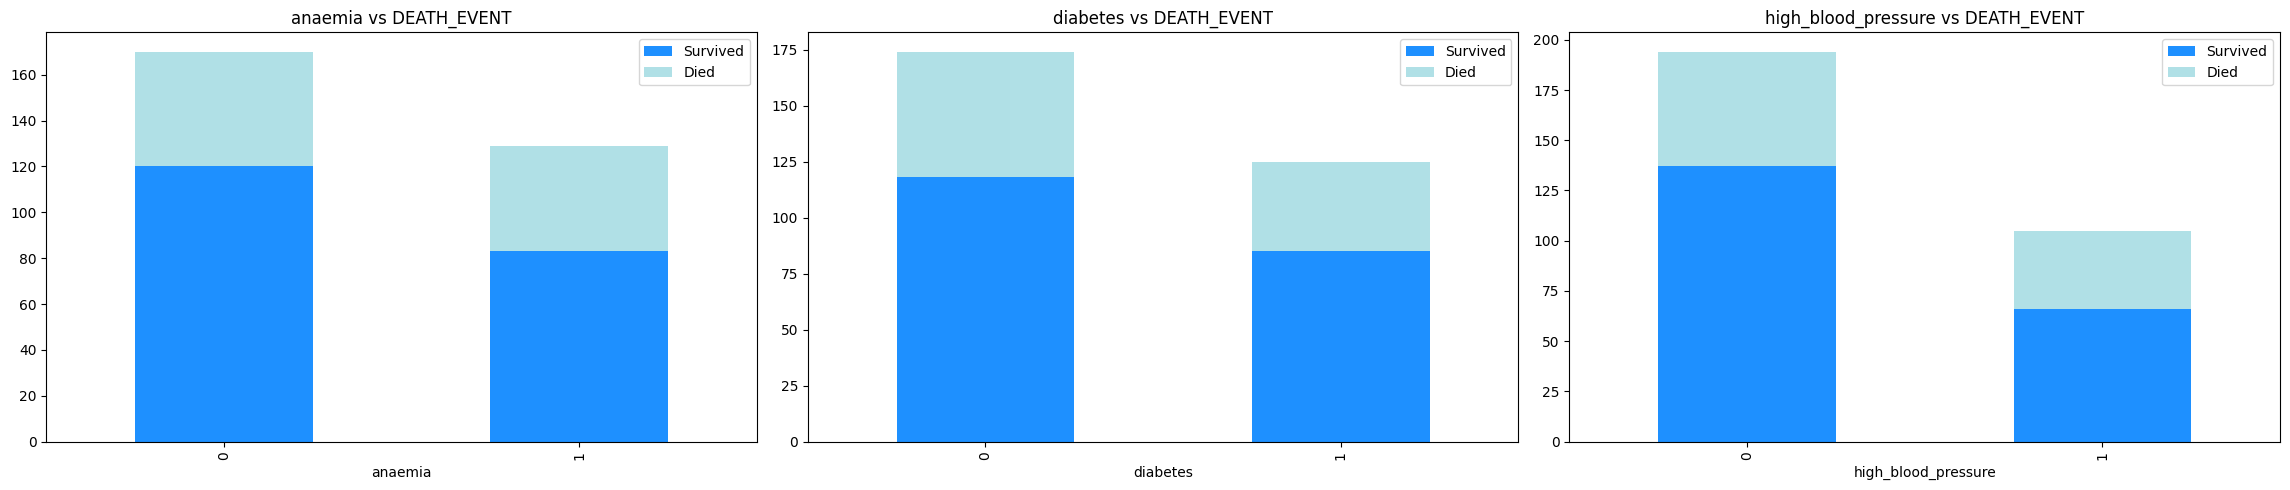

In [33]:
# Creating subplots in a single row
fig, axes = plt.subplots(1, len(categorical_variables) - 3, figsize=(23, 5))

# Iterating through categorical columns
for i, column in enumerate([col for col in categorical_variables if col not in ["DEATH_EVENT", "sex", "smoking"]]):
    ax = axes[i]
    grouped_data = df.groupby([column, 'DEATH_EVENT']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True, color=['dodgerblue', 'powderblue'], ax=ax)

    ax.set_xlabel(column)
    ax.set_title(f'{column} vs DEATH_EVENT')
    ax.legend(['Survived', 'Died'])

plt.tight_layout()
plt.show()

# This plots help to visualize how many people survived or died within each category of the categorical variable.
# Looking at those barplots, it is noticeable that having diseases such as diabetes or anaemia is not a death sentence.
# However, while analysing the plots carefully, it can be seen that the mortality remains consistent for those without aanemia as well as for those with anemia.
# Since the number of people who suffer from anaemia is smaller, it becomes visible that the proportion of those who died among the anemic population is higher.
# This suggests that having anaemia is associated with an increased likelihood of dying.
# The prognosis seems to be more favorable for other diseases, but its still worth mentioning.

In [56]:
df[(df["anaemia"] == 1) & (df["diabetes"] == 1) & (df["high_blood_pressure"] == 1) & (df["smoking"] == 1)]

# There are two individuals like this in our dataset, and they did not die, which is interesting because it involves a combination of health conditions that, individually, are often associated with higher health risks and potential complications

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
78,75.0,1,203,1,38,1,283000.0,0.6,131,1,1,74,0
255,52.0,1,191,1,30,1,334000.0,1.0,142,1,1,216,0
